### Try to determine call types from DeepSqueak data
#### analyze Call Length (s) &	Principal Frequency (kHz)


In [13]:
# Q: in python open xlsx file, analyze for unique call types 
# based on columns Call_Length	Principal_Frequency_kHz and graph 
# as heatmap
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Excel file
file_path = 'E2R3D3C1_USV_DS.xlsx'
data = pd.read_excel(file_path)

# Display the first few rows of the dataframe to understand its structure
data.head()


,File,ID,Label,Accepted,Score,Begin Time (s),End Time (s),Call_Length,Principal_Frequency_kHz,Low Freq (kHz),High Freq (kHz),Delta Freq (kHz),Frequency Standard Deviation (kHz),Slope (kHz/s),Sinuosity,Mean Power (dB/Hz),Tonality,Peak Freq (kHz)
0,C:\Users\jbw\Documents\MATLAB\DeepSqueak-maste...,1,USV,True,0.797419,0.780005,0.827089,0.047084,58.885525,52.455500,60.493031,8.037531,2.320668,91.758934,2.847717,-93.941315,0.395547,58.885525
1,C:\Users\jbw\Documents\MATLAB\DeepSqueak-maste...,2,USV,True,0.772222,1.989170,2.032486,0.043315,61.274013,54.799582,68.287980,13.488398,3.458325,59.587415,3.309373,-97.895962,0.326380,63.971692
2,C:\Users\jbw\Documents\MATLAB\DeepSqueak-maste...,3,USV,True,0.557097,2.337986,2.348308,0.010322,46.839747,43.372670,47.417593,4.044923,1.466915,177.086822,1.645992,-99.887682,0.341665,47.417593
3,C:\Users\jbw\Documents\MATLAB\DeepSqueak-maste...,4,USV,True,0.633535,2.455859,2.475801,0.019942,43.415012,38.911459,43.652042,4.740583,1.451716,121.904528,1.583760,-97.965940,0.449747,43.652042
4,C:\Users\jbw\Documents\MATLAB\DeepSqueak-maste...,5,USV,True,0.661349,3.950628,4.901358,0.950730,37.252566,35.896233,73.270751,37.374519,10.829525,-7.452931,13.891137,-104.276964,0.163261,57.145455


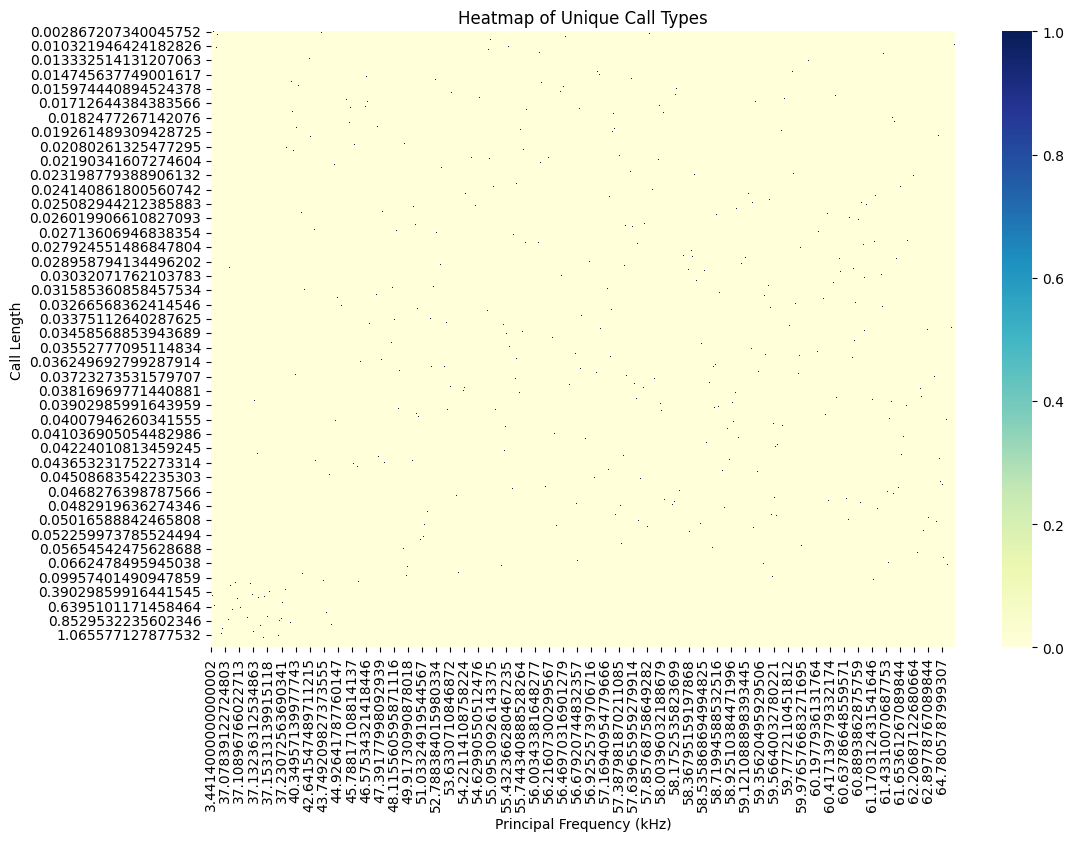

In [14]:
# Extract relevant columns
call_data = data[['Call_Length', 'Principal_Frequency_kHz']]

# Create a heatmap of unique call types based on Call_Length and Principal_Frequency_kHz
plt.figure(figsize=(12, 8))
heatmap_data = call_data.pivot_table(index='Call_Length', columns='Principal_Frequency_kHz', aggfunc='size', fill_value=0)

sns.heatmap(heatmap_data, cmap="YlGnBu", annot=False, cbar=True)
plt.title('Heatmap of Unique Call Types')
plt.xlabel('Principal Frequency (kHz)')
plt.ylabel('Call Length')
plt.show()


In [15]:
# Calculate the correlation between Call_Length and Principal_Frequency_kHz
correlation = call_data.corr()

# Display the correlation
correlation_value = correlation.loc['Call_Length', 'Principal_Frequency_kHz']
correlation_value


-0.5484709868906659

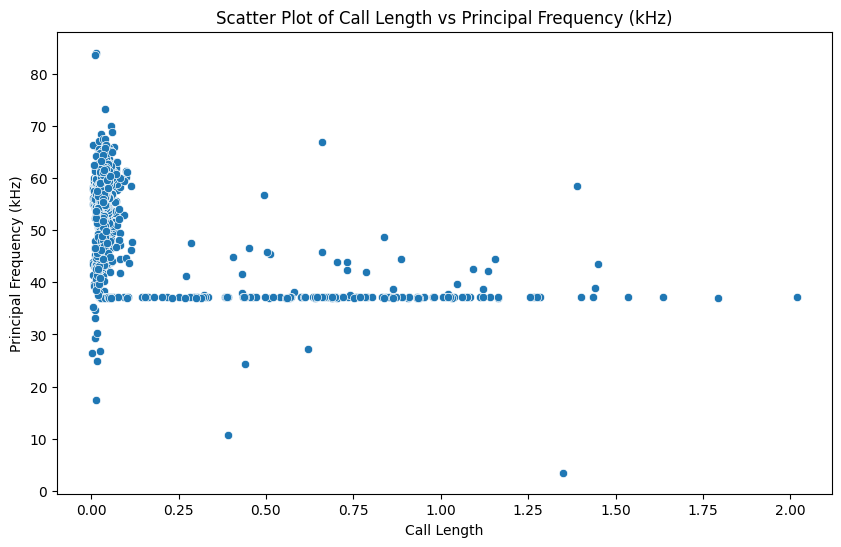

In [16]:
# Plot the relationship between Call_Length and Principal_Frequency_kHz
plt.figure(figsize=(10, 6))
sns.scatterplot(data=call_data, x='Call_Length', y='Principal_Frequency_kHz')
plt.title('Scatter Plot of Call Length vs Principal Frequency (kHz)')
plt.xlabel('Call Length')
plt.ylabel('Principal Frequency (kHz)')
plt.show()
